In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

Downloading data fom yahoo finance

In [2]:
end = datetime.now()
start = datetime(end.year -10, end.month, end.day)
stock = "XRP-USD" 
xrp_data = yf.download(stock, start, end)
xrp_data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,0.217911,0.221791,0.214866,0.217488,0.217488,147916992
2017-11-10,0.218256,0.219068,0.205260,0.206483,0.206483,141032992
2017-11-11,0.205948,0.214456,0.205459,0.210430,0.210430,134503008
2017-11-12,0.210214,0.210214,0.195389,0.197339,0.197339,251175008
2017-11-13,0.197472,0.204081,0.197456,0.203442,0.203442,132567000
...,...,...,...,...,...,...
2024-03-22,0.640695,0.644345,0.600405,0.610949,0.610949,2053036282
2024-03-23,0.610948,0.632407,0.605780,0.617596,0.617596,1160450696
2024-03-24,0.617608,0.635601,0.614912,0.632950,0.632950,1230486578


To get a summary statistics of the fetched Ripple price data

In [3]:
xrp_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2330.000000,2330.000000,2330.000000,2330.000000,2330.000000,2.330000e+03
mean,0.524240,0.545066,0.501979,0.524432,0.524432,2.360844e+09
std,0.330104,0.357317,0.303446,0.330040,0.330040,3.330255e+09
min,0.140524,0.146911,0.115093,0.139635,0.139635,1.002940e+08
25%,0.304655,0.312861,0.298101,0.304787,0.304787,8.529704e+08
50%,0.448210,0.461996,0.430009,0.448453,0.448453,1.403293e+09
75%,0.627186,0.646264,0.608581,0.627172,0.627172,2.411174e+09
max,3.363570,3.841940,3.117340,3.377810,3.377810,3.695518e+10


 .info() method to get a concise summary of the Ripple price data, including the number of entries (non-null values) in each column, column data types, and memory usage

In [4]:
xrp_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2330 entries, 2017-11-09 to 2024-03-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2330 non-null   float64
 1   High       2330 non-null   float64
 2   Low        2330 non-null   float64
 3   Close      2330 non-null   float64
 4   Adj Close  2330 non-null   float64
 5   Volume     2330 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 127.4 KB


Count the number of missing (NaN) values in each column

In [5]:
xrp_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

lowercase

In [6]:
xrp_data.columns = xrp_data.columns.str.lower()

Closing price data, containing only the 'Close' price

In [7]:
closing_price = xrp_data[['close']]
closing_price

,close
Date,
2017-11-09,0.217488
2017-11-10,0.206483
2017-11-11,0.210430
2017-11-12,0.197339
2017-11-13,0.203442
...,...
2024-03-22,0.610949
2024-03-23,0.617596
2024-03-24,0.632950


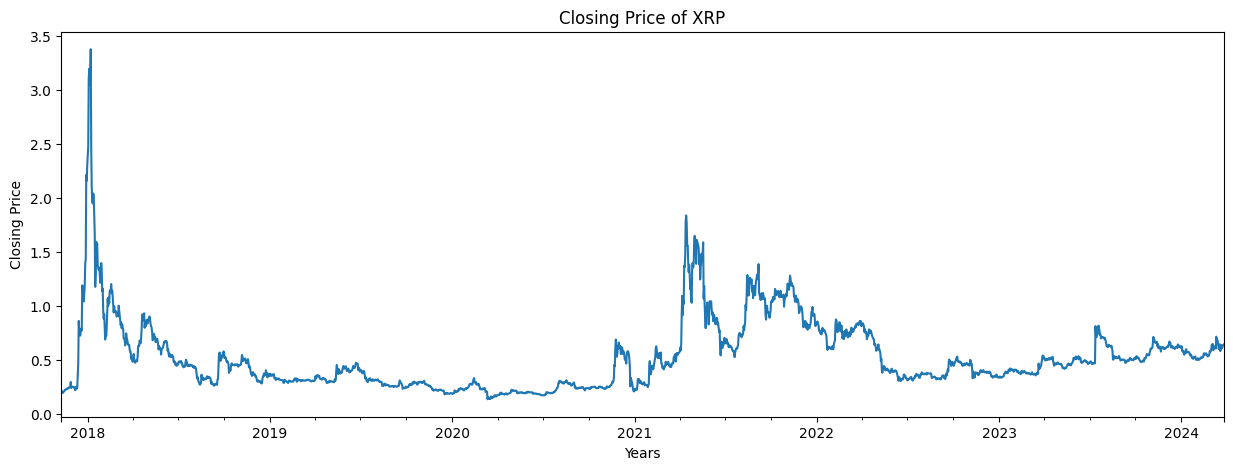

In [8]:
plt.figure(figsize=(15, 5))
closing_price['close'].plot()
plt.xlabel('Years')
plt.ylabel('Closing Price')
plt.title('Closing Price of XRP')
plt.show()


Prints the number of closing prices for each year from 2017 to 2023

In [9]:
for i in range(2017, 2024):
    print(f"Year {i}: {list(closing_price.index.year).count(i)}")

Year 2017: 53
Year 2018: 365
Year 2019: 365
Year 2020: 366
Year 2021: 365
Year 2022: 365
Year 2023: 365


Rolling average of the closing prices of Ripple (XRP) over a 365-day window and assigns the result to a new column named 'month_average_365_days' in the closing_price 

In [10]:
closing_price.loc[:, 'month_average_365_days'] = closing_price['close'].rolling(window=365).mean()
closing_price['month_average_365_days'].head()

C:\Users\aivi1\AppData\Local\Temp\ipykernel_22256\1759344284.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price.loc[:, 'month_average_365_days'] = closing_price['close'].rolling(window=365).mean()


Date
2017-11-09   NaN
2017-11-10   NaN
2017-11-11   NaN
2017-11-12   NaN
2017-11-13   NaN
Name: month_average_365_days, dtype: float64

Ploting both the original closing prices of Ripple (XRP) and the 365-day rolling average of closing prices

<Figure size 640x480 with 0 Axes>

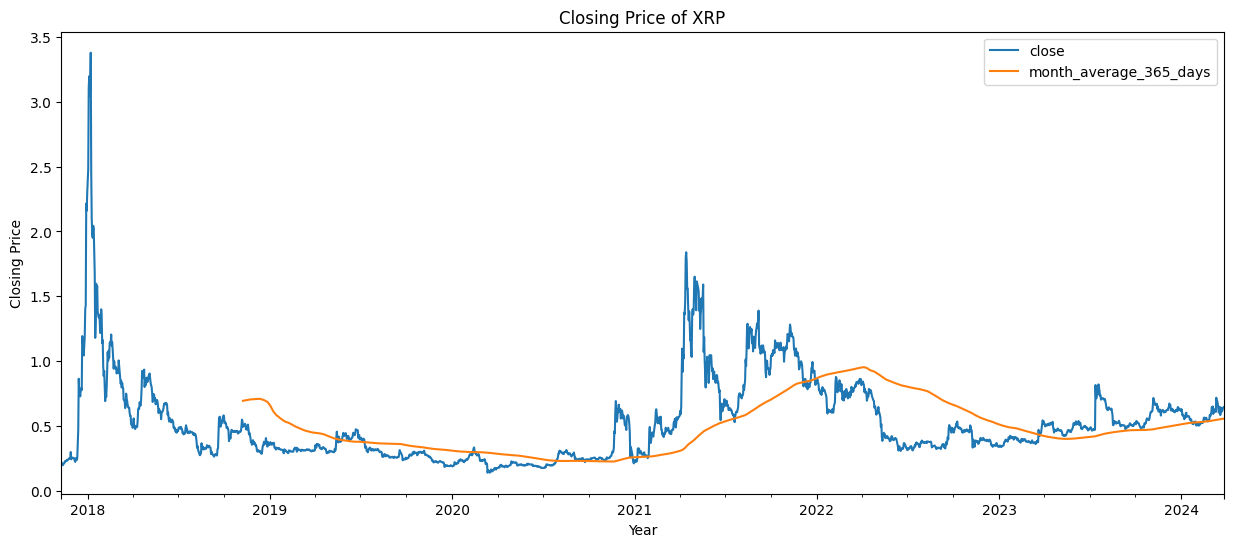

In [11]:
plt.figure()
closing_price[['close', 'month_average_365_days']].plot(figsize=(15, 6))
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.title('Closing Price of XRP')
plt.show()

Calculates a 100-day rolling average of the closing prices of Ripple (XRP) and adds it as a new column named 'month_average_100_days' in the closing_price 

C:\Users\aivi1\AppData\Local\Temp\ipykernel_22256\2273741351.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price.loc[:, 'month_average_100_days'] = closing_price['close'].rolling(window=100).mean()


<Figure size 640x480 with 0 Axes>

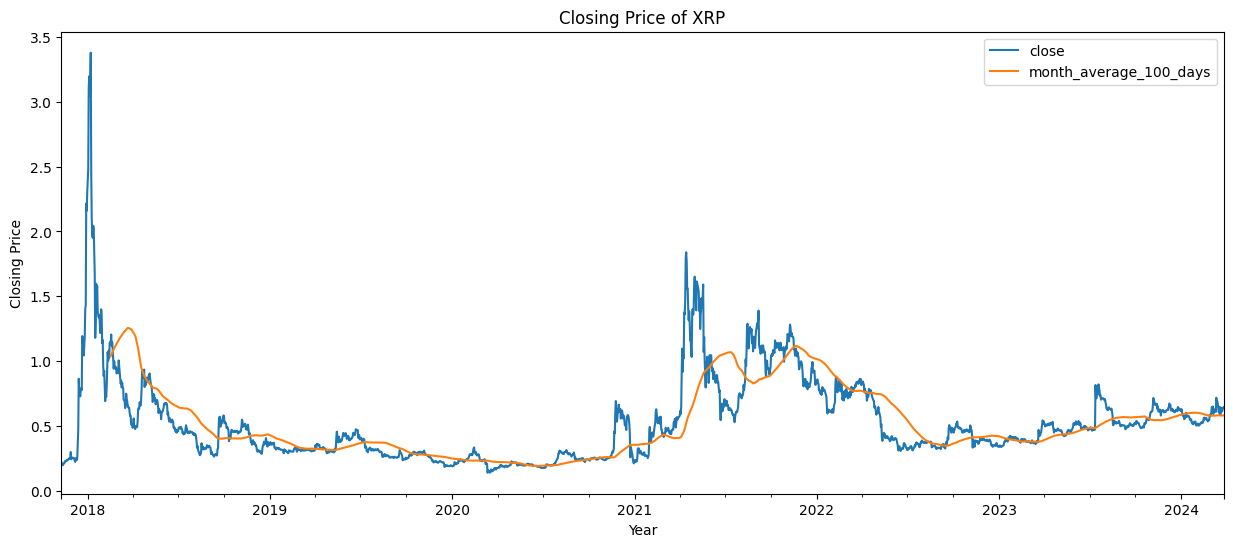

In [12]:
closing_price.loc[:, 'month_average_100_days'] = closing_price['close'].rolling(window=100).mean()

plt.figure()
closing_price[['close', 'month_average_100_days']].plot(figsize=(15, 6))
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.title('Closing Price of XRP')
plt.show()

Scale the 'close' prices of Ripple (XRP) to a range between 0 and 1

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(closing_price[['close']].values)
scaled_data

array([[0.02404225],
       [0.02064373],
       [0.02186262],
       ...,
       [0.15234353],
       [0.15484   ],
       [0.15629254]])

In [14]:
scaled_data.shape

(2330, 1)

Creating training data for a time series forecasting model

In [15]:
x_data = []
y_data = []

base_days = 100 

for i in range(base_days, len(scaled_data)):
    x_data.append(scaled_data[i-base_days: i])
    y_data.append(scaled_data[i])

x_data, y_data = np.array(x_data), np.array(y_data)
x_data[0], y_data[0]

(array([[0.02404225],
        [0.02064373],
        [0.02186262],
        [0.01781991],
        [0.01970462],
        [0.02167579],
        [0.02264269],
        [0.02701275],
        [0.02685031],
        [0.02748215],
        [0.02821991],
        [0.03061107],
        [0.02891629],
        [0.03064195],
        [0.03173609],
        [0.03242784],
        [0.03482147],
        [0.03371745],
        [0.03529519],
        [0.04926139],
        [0.03194052],
        [0.03435361],
        [0.03584241],
        [0.03577849],
        [0.03487242],
        [0.03518525],
        [0.0328784 ],
        [0.02869178],
        [0.02568978],
        [0.0347387 ],
        [0.03244822],
        [0.0301707 ],
        [0.03460468],
        [0.0722339 ],
        [0.10235024],
        [0.22377666],
        [0.19039922],
        [0.19115922],
        [0.18180951],
        [0.19726296],
        [0.20123126],
        [0.19650853],
        [0.32531443],
        [0.30839749],
        [0.31953338],
        [0

 The input-output pairs into training and testing sets for training and evaluating the time series forecasting model. It divides the data such that 90% is used for training (x_train and y_train), and the remaining 10% is used for testing (x_test and y_test).

In [16]:
len_train = int(len(x_data) * 0.9) # 90% data
x_train = x_data[:len_train]
y_train = y_data[:len_train]

x_test = x_data[len_train:]
y_test = y_data[len_train:]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2007, 100, 1)
(2007, 1)
(223, 100, 1)
(223, 1)


 Sequential model in Keras for time series forecasting using Long Short-Term Memory (LSTM) layers

In [17]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input

model = Sequential()

model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))

model.add(LSTM(64, return_sequences=False))

model.add(Dense(25))

model.add(Dense(1))

model.summary()

c:\Users\aivi1\ptu20_ml_reinforcement\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

The Adam optimizer is commonly used for training deep learning models, and mean squared error is a standard loss function for regression tasks

In [18]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

Model to the training data (x_train and y_train) using a batch size of 5 and training for 10 epochs

In [19]:
model.fit(x_train, y_train, batch_size=5, epochs=10)

Epoch 1/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 5.9977e-04 - loss: 0.0014
Epoch 2/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - accuracy: 2.8439e-04 - loss: 3.3956e-04
Epoch 3/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - accuracy: 5.4893e-04 - loss: 2.7249e-04
Epoch 4/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - accuracy: 3.1749e-05 - loss: 2.2266e-04
Epoch 5/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - accuracy: 5.5642e-04 - loss: 2.2068e-04
Epoch 6/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - accuracy: 1.6136e-04 - loss: 2.6814e-04
Epoch 7/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - accuracy: 7.5294e-04 - loss: 2.1730e-04
Epoch 8/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - accuracy: 3.3728e-04 - loss: 2.0970e-04
Epoch 9/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - accuracy: 9.9049e-05 - loss: 1.9660e-04
Epoch 10/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - accuracy: 3.7247e-04 - loss: 2.5341e-04


Predictions using the trained model on the test data x_test

In [20]:
predictions = model.predict(x_test)
predictions

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step


array([[0.13698761],
       [0.11414434],
       [0.11173049],
       [0.11592126],
       [0.1224421 ],
       [0.11929093],
       [0.11795462],
       [0.12029728],
       [0.11741671],
       [0.11919735],
       [0.11862557],
       [0.11861372],
       [0.11840826],
       [0.12297262],
       [0.120164  ],
       [0.11495726],
       [0.11087485],
       [0.11081757],
       [0.11262861],
       [0.11387043],
       [0.11323216],
       [0.11255345],
       [0.11291762],
       [0.11296439],
       [0.11269017],
       [0.110994  ],
       [0.1043915 ],
       [0.10543496],
       [0.10657047],
       [0.10836435],
       [0.11173081],
       [0.11180137],
       [0.10982423],
       [0.1123017 ],
       [0.11556082],
       [0.11782439],
       [0.11404734],
       [0.11495282],
       [0.11381421],
       [0.11212993],
       [0.1128117 ],
       [0.11192156],
       [0.11128041],
       [0.1139778 ],
       [0.11766736],
       [0.11629954],
       [0.11844936],
       [0.115

This will convert the scaled predictions back to the original scale of the closing prices

In [21]:
inverse_predictions = scaler.inverse_transform(predictions)
inverse_predictions

array([[0.5832249 ],
       [0.5092544 ],
       [0.5014379 ],
       [0.51500833],
       [0.53612393],
       [0.5259199 ],
       [0.5215927 ],
       [0.5291787 ],
       [0.51985085],
       [0.5256169 ],
       [0.5237654 ],
       [0.523727  ],
       [0.5230617 ],
       [0.5378419 ],
       [0.5287471 ],
       [0.5118867 ],
       [0.49866718],
       [0.4984817 ],
       [0.5043462 ],
       [0.50836736],
       [0.5063005 ],
       [0.50410277],
       [0.50528204],
       [0.5054335 ],
       [0.5045455 ],
       [0.499053  ],
       [0.47767296],
       [0.48105186],
       [0.48472884],
       [0.49053773],
       [0.501439  ],
       [0.50166744],
       [0.49526507],
       [0.50328755],
       [0.51384115],
       [0.52117103],
       [0.5089402 ],
       [0.51187235],
       [0.5081853 ],
       [0.5027313 ],
       [0.504939  ],
       [0.5020566 ],
       [0.49998045],
       [0.50871503],
       [0.52066255],
       [0.51623327],
       [0.5231948 ],
       [0.513

Display the first five elements of both the inverse-transformed predictions (inverse_predictions) and the inverse-transformed test target values (inverse_y_test)

In [22]:
inverse_y_test = scaler.inverse_transform(y_test)
inverse_predictions[:5], inverse_y_test[:5]

(array([[0.5832249 ],
        [0.5092544 ],
        [0.5014379 ],
        [0.51500833],
        [0.53612393]], dtype=float32),
 array([[0.50714201],
        [0.5061    ],
        [0.519629  ],
        [0.53954703],
        [0.52453798]]))

Create a DataFrame with two columns: 'original_test_data' containing the actual closing prices from the test data and 'predictions' containing the model's predictions

In [23]:
plotting_data = pd.DataFrame({
    'original_test_data': inverse_y_test.reshape(-1),
    'predictions': inverse_predictions.reshape(-1),
},
index = closing_price.index[len_train+100:])

plotting_data

,original_test_data,predictions
Date,,
2023-08-17,0.507142,0.583225
2023-08-18,0.506100,0.509254
2023-08-19,0.519629,0.501438
2023-08-20,0.539547,0.515008
2023-08-21,0.524538,0.536124
...,...,...
2024-03-22,0.610949,0.630648
2024-03-23,0.617596,0.607065
2024-03-24,0.632950,0.610240


Visualize the original test data and the model's predictions against the dates

<Figure size 640x480 with 0 Axes>

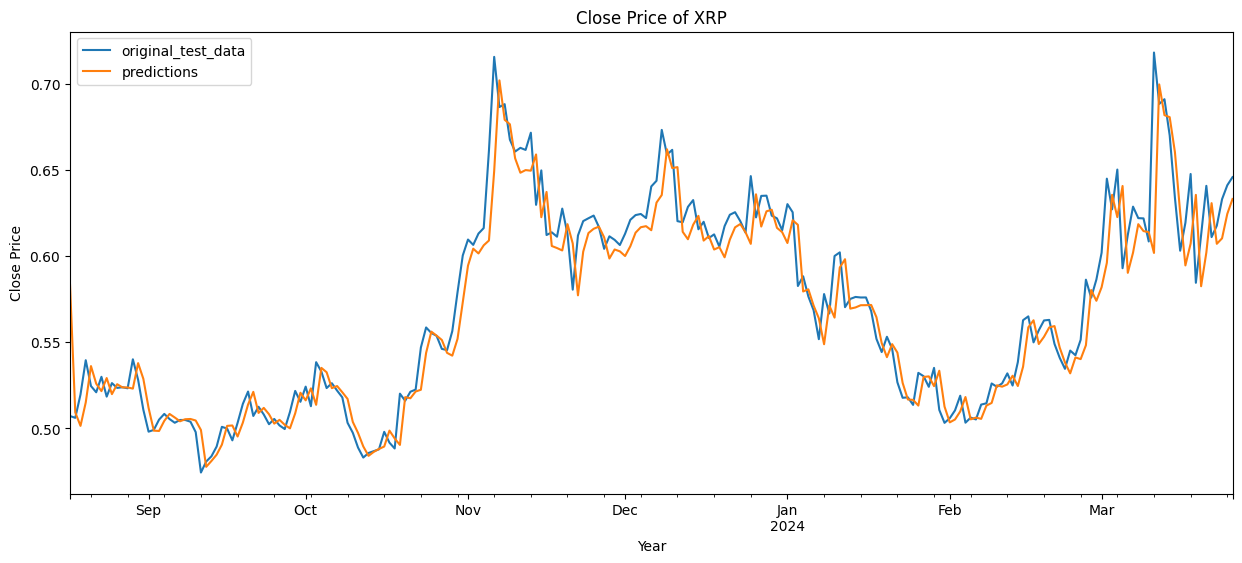

In [24]:
plt.figure()
plotting_data.plot(figsize=(15, 6))
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.title('Close Price of XRP')
plt.show()

Most recent 100 'close' prices of Ripple (XRP)

In [25]:
last_100 = closing_price[['close']].tail(100)
last_100.tail()

,close
Date,
2024-03-22,0.610949
2024-03-23,0.617596
2024-03-24,0.632950
2024-03-25,0.641034
2024-03-26,0.645738


Transforms the last 100 'close' prices using the fit_transform method of the scaler. The reshape(-1, 1) operation ensures that the input data is reshaped to a 2D array with a single feature. After scaling, the data is reshaped again to match the input shape required by the LSTM model, which is (batch_size, timesteps, features). The resulting array last_100 has the shape (1, 100, 1), representing a single batch with 100 timesteps and a single feature. This format is suitable for making predictions using the LSTM model

In [26]:
last_100 = scaler.fit_transform(last_100['close'].values.reshape(-1,1)).reshape(1, -1, 1)
last_100

array([[[5.08915743e-01],
        [4.75989377e-01],
        [5.31206417e-01],
        [5.61884739e-01],
        [5.68829178e-01],
        [5.44639471e-01],
        [5.13514481e-01],
        [6.66272434e-01],
        [5.54711973e-01],
        [6.12833465e-01],
        [6.13494589e-01],
        [5.59520173e-01],
        [5.52268338e-01],
        [5.20137929e-01],
        [5.90612704e-01],
        [5.68647736e-01],
        [3.69511498e-01],
        [3.95791389e-01],
        [3.41146694e-01],
        [3.04031359e-01],
        [2.25969609e-01],
        [3.47835339e-01],
        [2.95285267e-01],
        [4.50542896e-01],
        [4.60345455e-01],
        [3.12349093e-01],
        [3.34593159e-01],
        [3.39969266e-01],
        [3.38512185e-01],
        [3.38637862e-01],
        [3.01522527e-01],
        [2.26742262e-01],
        [1.91130062e-01],
        [2.32416055e-01],
        [1.99764348e-01],
        [1.09489142e-01],
        [6.76957231e-02],
        [6.88642731e-02],
        [4.8

In [27]:
last_100.shape

(1, 100, 1)

Trained LSTM model to predict the closing price for day 101 based on the last 100 days of data

In [28]:
day101 = model.predict(last_100)
day101

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


array([[0.6202215]], dtype=float32)

Predicted closing price for day 101

In [29]:
predicted_price_day101 = scaler.inverse_transform(day101)
predicted_price_day101

array([[0.63644326]], dtype=float32)

That predicts future closing prices for a specified number of days using an LSTM model

In [30]:
import numpy as np

# Define the function to predict future closing prices
def predict_future(no_of_days, previous_100, model, scaler):
    # Initialize an empty list to store future predictions
    future_predictions = []

    # Loop for the specified number of days to predict
    for i in range(no_of_days):
        # Predict the next day's closing price using the model
        # Reshape previous_100 to match the expected input shape of the model
        previous_100_reshaped = previous_100.reshape(1, -1, 1)
        next_day = model.predict(previous_100_reshaped).flatten()[0]
        
        # Update previous_100 for the next prediction
        # Append the predicted value and drop the oldest value (keeping the window size at 100)
        previous_100 = np.append(previous_100, [[[next_day]]], axis=1)
        previous_100 = previous_100[:, 1:]  # Drop the first element

        # Inverse transform the predicted value and append to future_predictions
        future_predictions.append(scaler.inverse_transform([[next_day]]).flatten()[0])
    
    # Return the list of future predictions
    return future_predictions


# Define the number of days to predict
no_of_days = 3  

# Call the function to predict future closing prices
future_results = predict_future(no_of_days, last_100, model, scaler)

# Print the predicted closing prices for the specified number of days
print(future_results)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[0.6364432521869574, 0.6259577899069271, 0.615548751681736]


Text(0.5, 1.0, 'Future Close Price of XRP')

<Figure size 640x480 with 0 Axes>

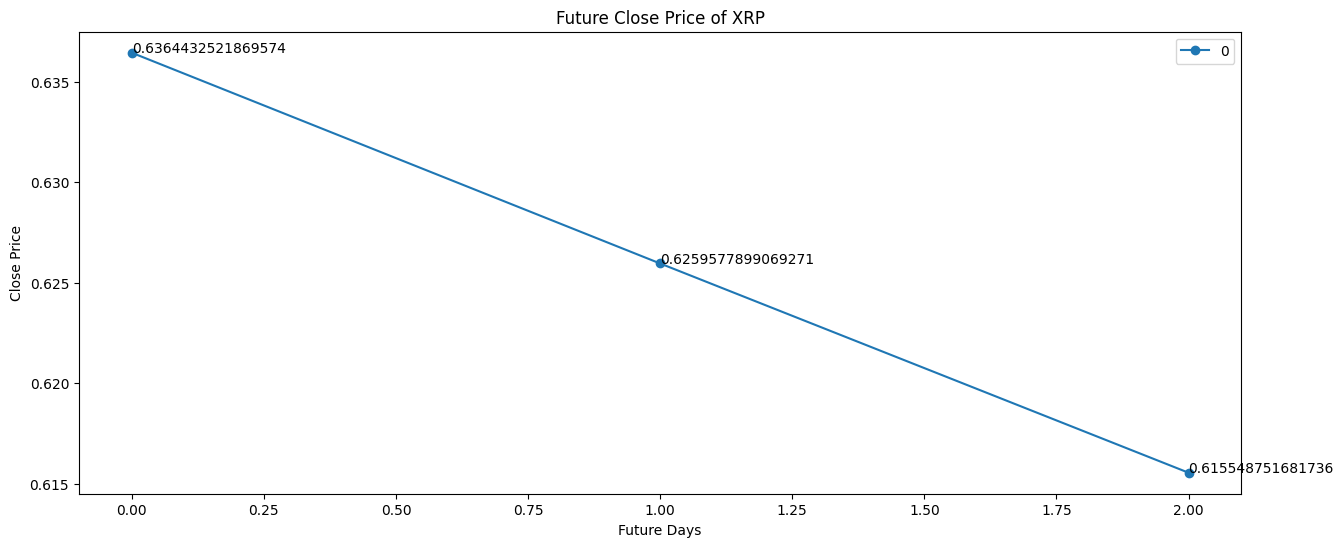

In [31]:
# Reshape the future_results array to a column vector
future_results = np.array(future_results).reshape(-1, 1)

# Plotting the future predictions
plt.figure()
pd.DataFrame(future_results).plot(figsize=(15, 6), marker='o')

# Annotate each point with its corresponding value
for i in range(len(future_results)):
    plt.text(i, future_results[i], str(future_results[i][0]))

# Set labels and title for the plot
plt.xlabel('Future Days')
plt.ylabel('Close Price')
plt.title('Future Close Price of XRP')

In [32]:
model.save('xrp_price_model.keras')